***Heart Disease Factors***

Heart diseases continue to be a prominent issue in global health, with numerous factors playing a role in their development and advancement. My analysis and investigation explores the complex connections between amount of heart disease hospitalizations and various influences, including lifestyle decisions and environmental exposures. By using data from reputable sources like Centers for Disease Control and Prevention(CDC), BioMed Central Ltd(BMC) and United States Census Bureau, I have provided a comprehensive view on why some of the factors like hypertension, air quality, smoking and a few others influence the increase in heart disease hospitalizations. 

The audience for this analysis includes the people part of the healthcare system, healthcare professionals, insurance policy providers, medical schools/institutions, medical researchers, organizations related to health care, pharmacies, physicians, non-profit organizations and finally the public, educating them about potential risks and learn from this analysis. 

The audience can get a deeper understanding of the diverse reasons behind heart disease hospitalizations. This analysis dives deep into providing a comprehensive viewpoint on heart disease hospitalization, highlighting the factors affecting it and the significance of how to prevent it from increasing. Healthcare professionals can gain knowledge from the analysis by looking at the different factors affecting heart diseases and learn from it. They can also provide guidance to their patients taking these factors into consideration. Insurance policy makers and health care researchers can use the findings from this analysis/investigation for thier purposes or to modify their policy and research. Non-profit organizations can use the analysis to bring awareness and steer their initiatives towards this problem. Medical schools and institutions can educate their students about the findings of this analysis/investigation to provide more knowledge about the subject. And finally, the public can get a better understanding and make themselves aware of how these various factors influence heart diseases.

#### The data is from these links - 
1. https://nccd.cdc.gov/DHDSPAtlas/?state=County
2. https://pophealthmetrics.biomedcentral.com/articles/10.1186/1478-7954-12-5
3. https://data.census.gov/cedsci/table?q=S2701&tid=ACSST5Y2018.S2701

### Project Execution

In [1]:
library(dplyr)
library(tidyr)
library(caret)
library(ggplot2)
library(reshape2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [2]:
data <- read.csv("MO_County_Data_CSV_DSA7010F23_Project_Data-v2.csv", stringsAsFactors = FALSE)
head(data)

cnty_fips,cnty_name,povpct,pop_2014,pop_densit,age_lt18,pct_age_lt,age_18_65,pct_age_18,age_gt_65,⋯,COVVac1Dos,COVFullVac,PctCOV1Dos,PctCOVFull,Cen2000PR,Cen2010PR,AllC_AAIRt,AllC_AvAnC,AllC_Statu,AllC_Rec5Y
<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>
29001,Adair,26.9,25602,44.864523,4759,18.6,17400,68.0,3443,⋯,9899,8783,0.39,0.35,0.79,0.81,456.3,116,stable,0.0
29003,Andrew,10.7,17379,39.784793,4020,23.1,10393,59.8,2967,⋯,5414,4879,0.31,0.28,0.81,0.79,427.3,98,stable,-0.1
29005,Atchison,12.2,5382,9.795111,1078,20.0,3046,56.6,1258,⋯,2364,2131,0.45,0.40,0.77,0.74,393.4,32,stable,-0.9
29007,Audrain,17.2,25887,37.117682,6068,23.4,15554,60.1,4265,⋯,8465,7161,0.33,0.28,0.79,0.80,464.9,148,falling,-1.0
29009,Barry,20.2,35662,45.068915,8321,23.3,20248,56.8,7093,⋯,14197,11608,0.40,0.33,0.69,0.60,386.1,196,stable,-0.7
29011,Barton,19.1,12057,20.339818,3068,25.4,6784,56.3,2205,⋯,3408,2929,0.29,0.25,0.77,0.73,466.5,77,stable,0.4


#### The summary of all the data columns in the MO County data set is shown below.

In [3]:
summary(data)

   cnty_fips      cnty_name             povpct         pop_2014      
 Min.   :29001   Length:115         Min.   : 6.80   Min.   :   2073  
 1st Qu.:29058   Class :character   1st Qu.:15.35   1st Qu.:  10226  
 Median :29115   Mode  :character   Median :18.00   Median :  18541  
 Mean   :29118                      Mean   :17.98   Mean   :  52727  
 3rd Qu.:29172                      3rd Qu.:20.70   3rd Qu.:  38463  
 Max.   :29510                      Max.   :32.20   Max.   :1001876  
   pop_densit         age_lt18        pct_age_lt      age_18_65     
 Min.   :   7.74   Min.   :   427   Min.   :16.90   Min.   :  1141  
 1st Qu.:  19.28   1st Qu.:  2269   1st Qu.:21.90   1st Qu.:  6096  
 Median :  30.51   Median :  4297   Median :23.10   Median : 10890  
 Mean   : 128.03   Mean   : 12195   Mean   :22.93   Mean   : 32618  
 3rd Qu.:  61.74   3rd Qu.:  9498   3rd Qu.:24.20   3rd Qu.: 22378  
 Max.   :4791.99   Max.   :225783   Max.   :28.40   Max.   :615014  
   pct_age_18      age_gt_6

#### Subsetting only the columns/variables from the data set that will help me defend my case.

In [4]:
selected_data <- data[, c("StrokeHosp", "Obesity", "Diabetes", "NonadhBld", 
                        "AvePM2p5", "TotCardDis", "Hyperten", "Age65plus",
                        "HeartDis", "SmokePrev2", "SmokeROC96",
                        "Age75plus", "PctUninsur", "TPops2701")]
head(selected_data)

StrokeHosp,Obesity,Diabetes,NonadhBld,AvePM2p5,TotCardDis,Hyperten,Age65plus,HeartDis,SmokePrev2,SmokeROC96,Age75plus,PctUninsur,TPops2701
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
9.7,28.2,8.2,20.0,9.5,55.5,4.4,3439,40.9,23.3,-0.2,1485,8.5,25021
9.1,31.3,10.1,21.5,9.9,55.6,5.3,3028,43.0,24.4,-0.9,1284,7.1,17198
9.2,39.3,19.3,20.4,9.2,43.7,3.8,1246,29.8,22.8,-1.0,532,8.5,5180
11.3,35.3,14.2,21.1,10.0,64.7,4.9,4188,49.8,28.8,-0.4,1810,10.0,23862
10.3,38.5,10.5,24.7,9.8,53.3,6.2,6845,39.7,28.3,-0.7,2833,15.5,35196
13.2,25.3,12.9,24.2,9.3,60.0,6.8,2266,40.7,27.0,-1.0,1053,9.7,11727


#### Written below are all the factors that influence the amount of heart diseases - 

1. StrokeHosp - All Stroke Hospitalizations 
2. Obesity - Obesity Percentage 
3. Diabetes - Diagnosed Diabetes Percentage 
4. NonadhBld - Nonadhearance to Blood Pressure Medication 
5. AvePM2p5 - Annual PM 2.5 ppm Air Quality 
6. TotCardDis - Total Cardiovascular Disease Hospitalizations 
7. Hyperten - Hypertension Hospitalizations 
8. HeartDis - All Heart Disease Hospitalizations 
9. SmokePrev2 - Smoking Prevalance 
10. SmokeROC96 - Smoking Rate of Change 
11. Age65plus - Age 65 plus 
12. Age75plus - Age 75 plus 
13. PctUninsur - Percent Uninsured 
14. TPops2701 - Total Civilian noninstitutionalized Population 2701

#### The summary of all the selected data columns (factors) is shown below.

In [5]:
summary(selected_data)

   StrokeHosp       Obesity         Diabetes       NonadhBld    
 Min.   : 8.50   Min.   :21.00   Min.   : 1.80   Min.   :18.60  
 1st Qu.:11.70   1st Qu.:30.00   1st Qu.: 8.65   1st Qu.:20.85  
 Median :12.80   Median :33.20   Median :10.90   Median :22.10  
 Mean   :12.62   Mean   :33.01   Mean   :11.17   Mean   :22.21  
 3rd Qu.:13.80   3rd Qu.:36.20   3rd Qu.:13.50   3rd Qu.:23.50  
 Max.   :18.50   Max.   :46.30   Max.   :21.20   Max.   :28.40  
    AvePM2p5        TotCardDis       Hyperten        Age65plus     
 Min.   : 9.000   Min.   :41.30   Min.   : 2.700   Min.   :   450  
 1st Qu.: 9.400   1st Qu.:58.80   1st Qu.: 5.750   1st Qu.:  2067  
 Median : 9.700   Median :63.90   Median : 6.900   Median :  3125  
 Mean   : 9.884   Mean   :64.37   Mean   : 7.077   Mean   :  8171  
 3rd Qu.:10.100   3rd Qu.:70.85   3rd Qu.: 8.250   3rd Qu.:  6380  
 Max.   :12.100   Max.   :94.20   Max.   :14.500   Max.   :163912  
    HeartDis       SmokePrev2      SmokeROC96        Age75plus      


In [6]:
selected_data <- na.omit(selected_data)
head(selected_data)

StrokeHosp,Obesity,Diabetes,NonadhBld,AvePM2p5,TotCardDis,Hyperten,Age65plus,HeartDis,SmokePrev2,SmokeROC96,Age75plus,PctUninsur,TPops2701
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
9.7,28.2,8.2,20.0,9.5,55.5,4.4,3439,40.9,23.3,-0.2,1485,8.5,25021
9.1,31.3,10.1,21.5,9.9,55.6,5.3,3028,43.0,24.4,-0.9,1284,7.1,17198
9.2,39.3,19.3,20.4,9.2,43.7,3.8,1246,29.8,22.8,-1.0,532,8.5,5180
11.3,35.3,14.2,21.1,10.0,64.7,4.9,4188,49.8,28.8,-0.4,1810,10.0,23862
10.3,38.5,10.5,24.7,9.8,53.3,6.2,6845,39.7,28.3,-0.7,2833,15.5,35196
13.2,25.3,12.9,24.2,9.3,60.0,6.8,2266,40.7,27.0,-1.0,1053,9.7,11727


#### Finding correlation values of selected factors that effect the amount of heart diseases.

In [7]:
correlations <- cor(selected_data)["HeartDis",]
correlations <- data.frame(Variable = names(correlations), Correlation = correlations)

correlations <- correlations[order(-correlations$Correlation),]
correlations

,Variable,Correlation
,<fct>,<dbl>
HeartDis,HeartDis,1.00000000
TotCardDis,TotCardDis,0.97248036
Hyperten,Hyperten,0.69283917
StrokeHosp,StrokeHosp,0.68541841
SmokePrev2,SmokePrev2,0.45515024
NonadhBld,NonadhBld,0.42500206
AvePM2p5,AvePM2p5,0.39122072
SmokeROC96,SmokeROC96,0.19717649
Obesity,Obesity,0.16208857


#### The above output shows the correlation factor of each variable to the total heart disease hospitalization.

#### Building the Machine Learning Model by first splitting the data sets into two datasets - training and testing data

In [8]:
set.seed(123)

trainIndex <- createDataPartition(selected_data$HeartDis, p = 0.7, list = FALSE, times = 1)

train_data <- selected_data[trainIndex, ]
test_data <- selected_data[-trainIndex, ]

#### Building the linear regression model and displaying the summary of the model

In [9]:
model <- lm(HeartDis ~ ., data = train_data)
summary(model)


Call:
lm(formula = HeartDis ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8157 -0.7106  0.1636  0.6867  2.5187 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.089e+00  3.519e+00  -1.162   0.2493    
StrokeHosp  -1.051e+00  1.324e-01  -7.942 2.79e-11 ***
Obesity     -2.683e-02  3.279e-02  -0.818   0.4161    
Diabetes     3.304e-02  4.127e-02   0.801   0.4262    
NonadhBld   -4.589e-02  1.020e-01  -0.450   0.6542    
AvePM2p5     1.736e-01  3.667e-01   0.473   0.6374    
TotCardDis   8.987e-01  3.622e-02  24.814  < 2e-16 ***
Hyperten     2.085e-01  1.081e-01   1.929   0.0580 .  
Age65plus    4.646e-05  3.696e-04   0.126   0.9003    
SmokePrev2   1.575e-01  9.965e-02   1.581   0.1185    
SmokeROC96  -1.156e+00  6.544e-01  -1.767   0.0818 .  
Age75plus    4.148e-04  8.141e-04   0.510   0.6120    
PctUninsur  -3.543e-02  3.969e-02  -0.893   0.3751    
TPops2701   -3.391e-05  1.663e-05  -2.039   0.0453 *  
---
Signif. c

#### Predictions using lm model

In [10]:
predictions_lm <- predict(model, newdata = test_data)

#### Computing R-squared for the lm model on test data

In [11]:
R2_value_lm <- 1 - (sum((predictions_lm - test_data$HeartDis)^2) / sum((test_data$HeartDis - mean(test_data$HeartDis))^2))
print(paste("R-squared value for lm model:", R2_value_lm))

[1] "R-squared value for lm model: 0.973986077448239"


#### Computing Mean Absolute Error for the lm model

In [12]:
MAE_value_lm <- mean(abs(predictions_lm - test_data$HeartDis))
print(paste("Mean Absolute Error (MAE) for lm model:", MAE_value_lm))

[1] "Mean Absolute Error (MAE) for lm model: 0.837333074774044"


#### Any error value less than 1 is very good in terms of these models. These values being less than 1 prove that the different factors I selected highly influence in the increase of heart disease hospitalizations.

### Data science and Analytics Project Lifecycle Step 4 - Exploratory Data Analysis & Visualization (Part 2)

#### Plotting a correlation map. 
#### x axis - the factors influencing the increase in health disease hospitalizations and y axis - heart disease correlation value.

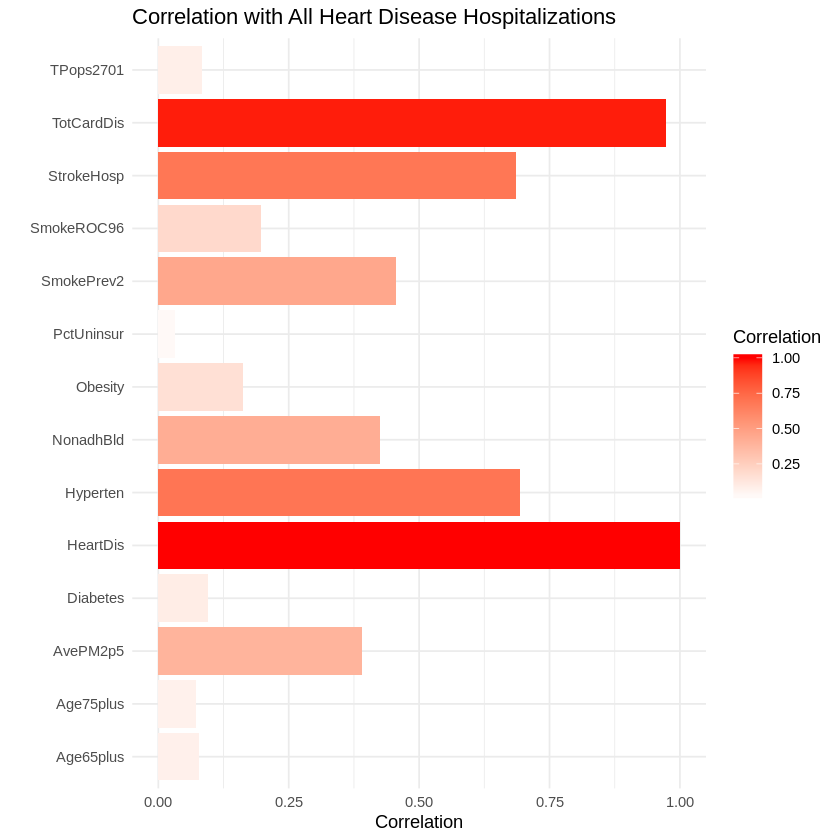

In [13]:
ggplot(correlations, aes(x=Variable, y=Correlation)) +
geom_bar(stat="identity", aes(fill=Correlation)) +
coord_flip() +
scale_fill_gradient2(low="blue", mid="white", high="red") +
labs(title="Correlation with All Heart Disease Hospitalizations", x="", y="Correlation") +
theme_minimal()

The correlation graph above shows the correlation of the selected factors to the amount of heart disease hospitalizations. And the map shows that a lot of the factors I have selected influence the increase in heart disease hospitalizations. Some of the factors being non adhearance to blood pressure medication, total cardiovascular disease hospitalizations, stroke hospitalizations, smoking rate of change and hypertension hospitalizations. 

#### Plotting the linear regression model as a scatter plot. x axis - Actual Values and y axis - Predicted Values

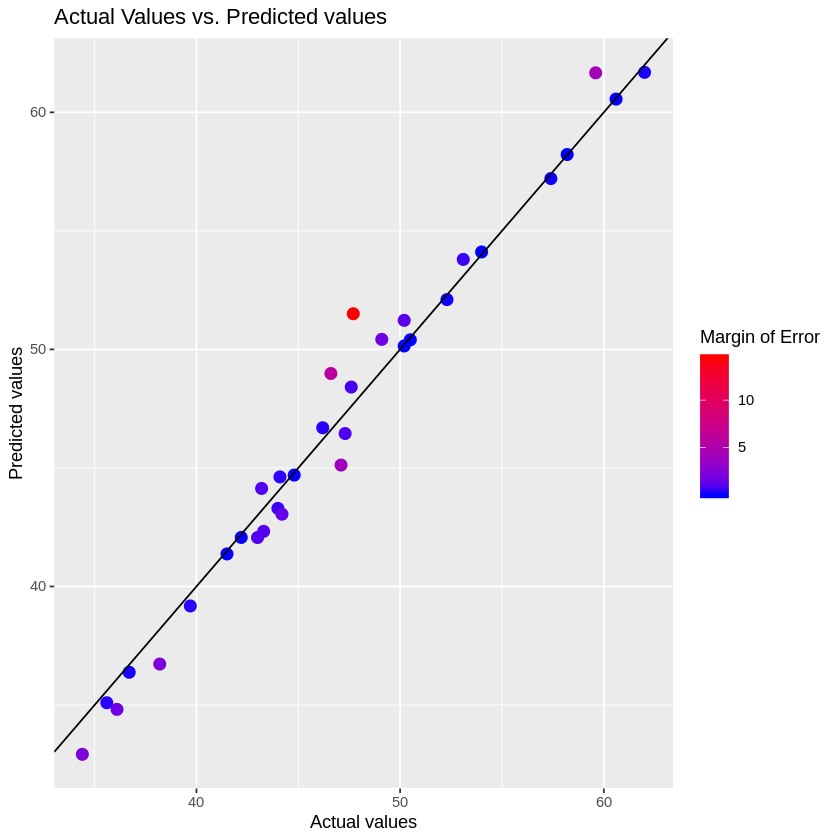

In [14]:
ggplot() +
geom_point(aes(x = test_data$HeartDis, y = predictions_lm, color = (test_data$HeartDis - predictions_lm)^2), size = 3) +
scale_color_gradient(low = "blue", high = "red") +
geom_abline(intercept = 0, slope = 1, color = "black") +
labs(title = "Actual Values vs. Predicted values", x = "Actual values", y = "Predicted values", color = "Margin of Error") +
theme_grey()

The graph above shows that the linear regression model has provided a 45 degree slope linear regression line which indicates the correspondance between actual values and predicted values. The margin of error goes from least being blue and maximum being red.  Also the graph shows that most of the values are very close to the linear regression line which further proves my point. This shows that the model's predictions are largely in sync with the actual data. This further explains that the selected factors higly influence heart disease hospitalizations.

My analysis into heart disease reveals that the various determinants like hypertension, non adhearance to blood pressure medication, air quality, smoking and a few others directly influence the amount of heart disease hospitalizations. My story emphasizes on the impact of these factors on health.

The "So What!" aspect of the investigation lies in my findings. The correlation graph and linear regression model clearly show that these factors play a major role in the increase of health disease hospitalizations. 

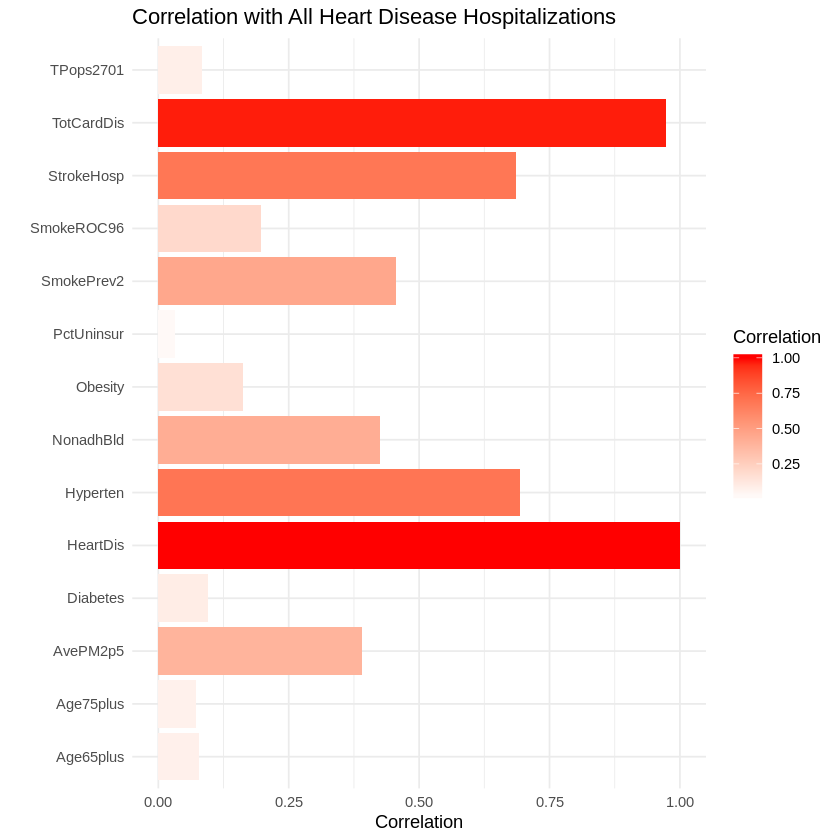

The correlation graph above shows the correlation of the selected factors to the amount of heart disease hospitalizations. And the map shows that a lot of the factors I have selected influence the increase in heart disease hospitalizations. Some of the factors being non adhearance to blood pressure medication, total cardiovascular disease hospitalizations, stroke hospitalizations, smoking rate of change and hypertension hospitalizations.

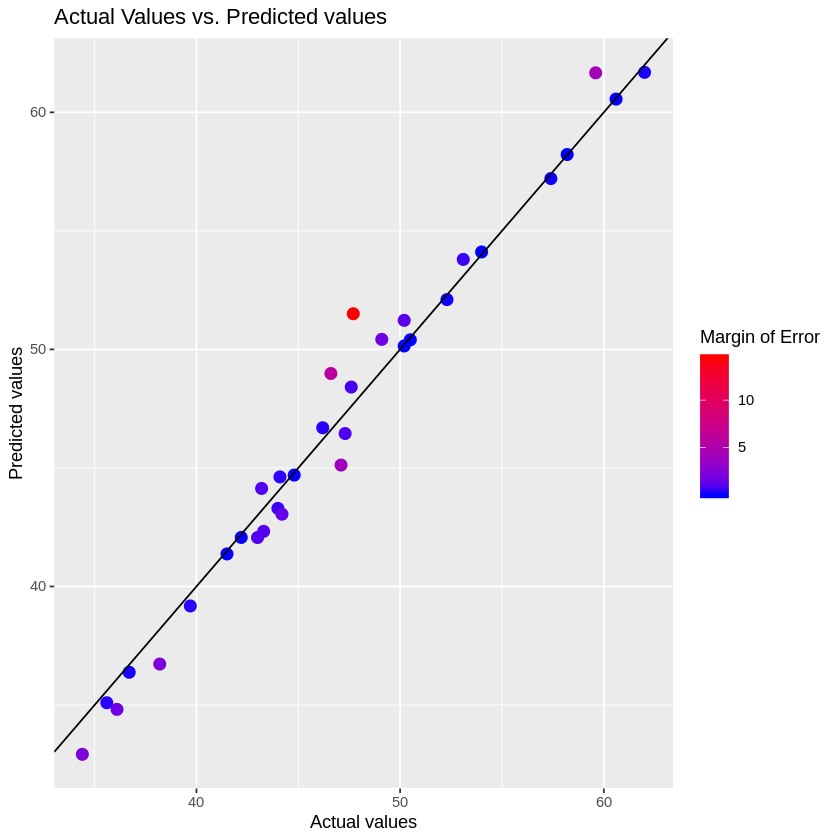

The graph above shows that the linear regression model has provided a 45 degree slope linear regression line which indicates the correspondance between actual values and predicted values. The margin of error goes from least being blue and maximum being red.  Also the graph shows that most of the values are very close to the linear regression line which further proves my point. This shows that the model's predictions are largely in sync with the actual data. This further explains that the selected factors higly influence heart disease hospitalizations.

I chose this topic beacause of the significance and impact of these factors on heart diseases. The reason this analysis is unique is because of the different factors I have used to prove thier influence on the amount of heart disease hospitalizations. And I consider this to be a data science project because I extracted data from a large data set and I performed different methodologies and analytical techniques to convert raw data into usable insight, helping in having a positive effect in the reduction of heart disease hospitalizations.